<a href="https://colab.research.google.com/github/JanDziuba/deeplife-project/blob/main/Task_1_DL4DS_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task



Recent progress in spatial tissue imaging has resulted in the emergence of many new technologies that enable measurements of multiple biological markers at the subcellular level. One such technology is IMC (Imaging Mass Cytometry), developed at [BodemillerLab](https://www.bodenmillerlab.com/#/) in Zurich. [Here](https://www.nature.com/articles/s41586-019-1876-x), you can read how this technology has enabled massive progress in understanding the mechanisms behind breast cancer.


1. **Perform EDA (exploratory data analysis) (3pts)** - in the form of an approx. 5-minute presentation - you will present your insight about the data you were provided with.


#### Data
We will provide you with [training data](https://drive.google.com/file/d/1-0YOHE1VoTRWqfBJLHQorGcHmkhCYvqW/view?usp=sharing) and a hold-out test set. In the code below the task description you will be provided with a brief data overview.

#### Grading
1. **EDA** - A maximal number of points (3) will be assigned when a team will present:
    - A general data overview,
    - Correlation patterns between markers and cell types (at least 3) - with a biological explanation,
    - Three biologically driven patterns of intertype marker differentiation (e.g., Tumor PDL1+ vs Tumor PDL1-, Mac CD206+ vs Mac CD206-, etc.),

#### Additional points:
- Any interesting biological insight gained from EDA or baseline/method training will be awarded with up to 3 activity points


Possible steps:

Explore the distributions of marker expression levels across cells.

Visualize the spatial distribution of cells and marker expression patterns within your tissue sample.

Investigate relationships between different markers and cell types.

Identify potential outliers or unusual patterns in the data.

In [ ]:
!pip install anndata
!pip install delayedarray
!pip install pyometiff

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 26.3 MB/s eta 0:00:00


Now - download the training data from [here](https://drive.google.com/file/d/1-0YOHE1VoTRWqfBJLHQorGcHmkhCYvqW/view?usp=sharing).

Unzip the archive and set `PATH_TO_FOLDER` to a path where you unzipped the data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

import anndata

# Nastia
#PATH_TO_FOLDER = "drive/MyDrive/"
#TRAIN_DATA_PATH = 'drive/MyDrive/train'

# Zuz
PATH_TO_FOLDER = 'drive/MyDrive/Deep Learning/project1'
TRAIN_DATA_PATH = 'drive/MyDrive/Deep Learning/project1/train'


ORIGINAL_IMAGE_DATA_SUBDIR = 'images_masks'
ORIGINAL_MASKS_SUBDIR = 'masks'
ORIGINAL_IMAGES_SUBDIR = 'img'

if PATH_TO_FOLDER is None:
    raise ValueError('Please set PATH_TO_FOLDER to a path with unzipped training data.')

ANNDATA_PATH = 'cell_data.h5ad'
TRAIN_ANNDATA_PATH = os.path.join(TRAIN_DATA_PATH, ANNDATA_PATH)
TRAIN_IMAGE_DATA_DIR = os.path.join(TRAIN_DATA_PATH, ORIGINAL_IMAGE_DATA_SUBDIR)
TRAIN_IMAGE_DATA_IMAGES = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_IMAGES_SUBDIR)
TRAIN_IMAGE_DATA_MASKS = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_MASKS_SUBDIR)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import pandas as pd
import numpy as np

## Data overview

A provided training data consist of two entities:
- a tabular data (stored in a `cell_data.h5ad` file),
- image data - stored in `images_masks` directory.

Let us start with having a look at the tabular data:

In [ ]:
train_anndata = anndata.read_h5ad(TRAIN_ANNDATA_PATH)
train_anndata_df = pd.DataFrame(train_anndata.obs)

train_anndata.obs.head()

,image,sample_id,ObjectNumber,Pos_X,Pos_Y,area,major_axis_length,minor_axis_length,eccentricity,width_px,...,flag_tumor,PD1_pos,Ki67_pos,cleavedPARP_pos,GrzB_pos,tumor_patches,distToCells,CD20_patches,Batch,cell_labels
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,1.0,300.846154,0.692308,13.0,6.094800,2.780135,0.889904,600.0,...,0,0,0,0,0,1,8.773580,,Batch20191023,MacCD163
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_3,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,3.0,26.982143,0.928571,56.0,21.520654,3.368407,0.987675,600.0,...,0,0,0,0,0,0,72.247393,,Batch20191023,Mural
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_5,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,5.0,309.083333,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,16.982199,,Batch20191023,DC
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_7,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,7.0,431.916667,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,-8.314676,,Batch20191023,Tumor
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_8,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,8.0,116.931034,1.206897,29.0,9.216670,4.112503,0.894932,600.0,...,0,0,0,0,0,1,-15.358007,,Batch20191023,Tumor


In [ ]:
train_anndata.layers['exprs']

array([[0.        , 1.81998789, 0.50264976, ..., 0.42427316, 4.76113044,
        5.30135121],
       [0.13592021, 2.39308671, 1.1369607 , ..., 0.1186204 , 5.02924127,
        5.53076447],
       [0.16590455, 2.24491655, 1.39633367, ..., 0.01514088, 4.41838981,
        4.81592274],
       ...,
       [0.11088375, 3.52028872, 0.31083376, ..., 0.10251545, 4.30306951,
        4.82609754],
       [0.15094134, 4.2149584 , 2.65164581, ..., 0.08397474, 4.8224562 ,
        5.36166154],
       [0.49059059, 5.8223478 , 1.61541043, ..., 0.22942113, 4.44821169,
        5.01081325]])

Train `anndata` `obs` dataframe stores the information about cells. Each row in this table represent an information about a single cell. It has the following columns that are interesting for your analysis:
- `image` - name of the image file from which a cell was obtained,
- `sample_id` - name of the patient sample from which a given image was obtained,
- `ObjectNumber` - a cell number within a given image (note that it starts from 1),
- `Pos_X`, `Pos_Y` - a spatial position of the cell one the image,
- `area`, `major_axis_length`, `minor_axis_length`, `eccentricity`, `width_px`, `height_px` - shape-derived features of a cell,
- `Batch` - a batch in which a sample was used,
- `cell_labels` - your target cell type annotations. **THIS IS WHAT YOUR MODELS AIM TO PREDICT!**

`train_anndata.var` stores the information about the marker names. Please use the `marker` column in your analysis:

`train_anndata.layers['exprs']` with shape `(train_anndata.obs.shape[0], train_anndata.var.shape[0])` stores the matrix with marker expressions for each cell:

## General data overview

In [ ]:
indexes = list(train_anndata_df.index) # cell ids
markers = list(train_anndata.var.marker)
cell_types = train_anndata_df['cell_labels'].unique()
# colors for 14 cell types
color_map = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#f00980', '#c1ff42', '#7cf5f2', '#9cff49']

In [ ]:
# combine expression values with corresponding cell type

data = {
    'cell_labels': train_anndata_df['cell_labels'],
}
label_df = pd.DataFrame(data, index=train_anndata_df.index)


names = list(train_anndata.var.marker)
expr = pd.DataFrame(train_anndata.layers['exprs'], columns=names, index=indexes) # markers in columns, cells in rows

expr.reset_index(inplace=True)
expr = expr.rename(columns={'index': 'cell_id'})
expr.set_index('cell_id', inplace=True)

combined_df = pd.concat([expr, label_df], axis=1)

combined_df.head()

,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,CD163,...,CD40,CD4,CD14,Ecad,CD303,CD206,cleavedPARP,DNA1,DNA2,cell_labels
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1,0.000000,1.819988,0.502650,1.265410,0.515007,3.331261,0.403800,0.455421,0.528734,2.948392,...,0.567238,1.651610,2.556218,0.777378,0.000000,3.581082,0.424273,4.761130,5.301351,MacCD163
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_3,0.135920,2.393087,1.136961,0.505529,0.605836,0.710857,0.419814,0.100110,0.743002,0.329851,...,0.603468,1.358368,1.700181,1.884778,0.068872,0.744634,0.118620,5.029241,5.530764,Mural
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_5,0.165905,2.244917,1.396334,1.744382,0.458541,4.006500,0.003607,0.562882,1.236516,1.747839,...,0.812795,1.949510,3.465199,1.743507,0.403610,2.244398,0.015141,4.418390,4.815923,DC
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_7,0.165905,1.144778,0.563216,1.166010,0.513735,2.034705,0.650242,0.250150,1.205007,0.990385,...,1.228290,2.287524,2.491710,2.268924,0.196199,0.946492,0.233095,3.736089,4.368012,Tumor
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_8,0.137497,2.210970,0.892371,0.497646,0.412840,1.499184,0.098131,0.208566,0.922874,1.255892,...,0.360098,1.445085,2.332546,2.387292,0.061568,1.632904,0.372278,4.607359,5.152041,Tumor


In [ ]:
len(train_anndata.obs.sample_id.unique()) # -> 125 samples

125

In [ ]:
# number of cells per sample

grouped_sample = train_anndata_df.groupby('sample_id')
cell_counts = [len(group) for name, group in grouped_sample]
plt.figure(figsize=(6, 6))
plt.boxplot(cell_counts)
plt.ylabel('Number of Cells')
plt.title('Distribution of Number of Cells in Samples')
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(200))
plt.show()
# -> median = 1800 cell per sample, with few outliers

In [ ]:
sorted_cell_counts = sorted(cell_counts, reverse=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=range(len(grouped_sample)), y=sorted_cell_counts, color='skyblue')
plt.xticks(ticks=range(0, len(sorted_cell_counts),5))
plt.xlabel('Sample number')
plt.ylabel('Number of Cells')
plt.title('Number of Cells per Sample')
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(300))

In [ ]:
for sample, group in grouped_sample:
  if len(group)==5152:
    print('Sample with max number of cells: ' + sample)

Let's examine the marker's expression levels; this data is stored as a matrix :

In [ ]:
marker_expr_matrix = train_anndata.layers['exprs']
print(f"the shape of the matrix : {train_anndata.obs.shape[0]} x {train_anndata.var.shape[0]}")
print(marker_expr_matrix)
# numpy.ndarray; poszczególne komórki (obserwacje) - wiersze, markery - kolumny
names = list(train_anndata.var.marker)
index_dict = {name: index for index, name in enumerate(names)}
print(index_dict)

# list of marker names
print(names)

the shape of the matrix : 236791 x 40
[[0.         1.81998789 0.50264976 ... 0.42427316 4.76113044 5.30135121]
 [0.13592021 2.39308671 1.1369607  ... 0.1186204  5.02924127 5.53076447]
 [0.16590455 2.24491655 1.39633367 ... 0.01514088 4.41838981 4.81592274]
 ...
 [0.11088375 3.52028872 0.31083376 ... 0.10251545 4.30306951 4.82609754]
 [0.15094134 4.2149584  2.65164581 ... 0.08397474 4.8224562  5.36166154]
 [0.49059059 5.8223478  1.61541043 ... 0.22942113 4.44821169 5.01081325]]
{'MPO': 0, 'HistoneH3': 1, 'SMA': 2, 'CD16': 3, 'CD38': 4, 'HLADR': 5, 'CD27': 6, 'CD15': 7, 'CD45RA': 8, 'CD163': 9, 'B2M': 10, 'CD20': 11, 'CD68': 12, 'Ido1': 13, 'CD3': 14, 'LAG3': 15, 'CD11c': 16, 'PD1': 17, 'PDGFRb': 18, 'CD7': 19, 'GrzB': 20, 'PDL1': 21, 'TCF7': 22, 'CD45RO': 23, 'FOXP3': 24, 'ICOS': 25, 'CD8a': 26, 'CarbonicAnhydrase': 27, 'CD33': 28, 'Ki67': 29, 'VISTA': 30, 'CD40': 31, 'CD4': 32, 'CD14': 33, 'Ecad': 34, 'CD303': 35, 'CD206': 36, 'cleavedPARP': 37, 'DNA1': 38, 'DNA2': 39}
['MPO', 'Histone

For given marker type, creating a profile of expression levels for every cell type - looking for trends.

In [ ]:
def show_expression_profile(marker_name):
  marker_index= index_dict[marker_name]
  print(f"Showing expression profile for marker {marker_name}")

  expr_dict = {}
  for j in range(train_anndata.obs.shape[0]):
    level = marker_expr_matrix[j][marker_index]
    label = train_anndata.obs.iloc[j]['cell_labels']

    if label in expr_dict:
        expr_dict[label].append(level)
    else:
        expr_dict[label] = [level]

  # Convert the dictionary to a format suitable for Seaborn boxplot
  data = []
  for label, levels in expr_dict.items():
      for level in levels:
          data.append({'Label': label, 'Expression Level': level})
  df = pd.DataFrame(data)

  # Create a boxplot using Seaborn
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Label', y='Expression Level', data=df)
  plt.xlabel('Label')
  plt.ylabel('Expression Level')
  plt.title('Boxplot of Expression Levels by Label')
  plt.xticks(rotation=45)
  plt.show()

Enter chosen marker's index to view its profile of expression :

In [ ]:
show_expression_profile('Ki67')

In [ ]:
# 14 cell types: various types of immune cells and tumor
cell_types
print(cell_types)

['MacCD163', 'Mural', 'DC', 'Tumor', 'CD4', ..., 'Neutrophil', 'plasma', 'B', 'pDC', 'BnT']
Length: 14
Categories (14, object): ['B', 'BnT', 'CD4', 'CD8', ..., 'Treg', 'Tumor', 'pDC', 'plasma']


In [ ]:
# Group by samples and create scatterplots colored by cell type

for sample, group in grouped_sample:
  x_data = group['Pos_X']
  y_data = group['Pos_Y']

  plt.figure(figsize=(6, 6))
  for i, cell_type in enumerate(cell_types):
      mask = group['cell_labels'] == cell_type
      plt.scatter(x_data[mask], y_data[mask], label=cell_type, color=color_map[i], s=7)

  plt.title('Cell Types of sample ' + sample)
  plt.legend()

  plt.show()


In [ ]:
# % of tumor in each sample
data = []

for name, group in grouped_sample:
  tumor_num = len(group[group['cell_labels'] == 'Tumor'])
  total_cells = len(group)
  tumor_per = tumor_num / total_cells

  data.append({'percentage': tumor_per, 'total': total_cells, 'sample': name})

tumor_rep_df= pd.DataFrame(data)

tumor_rep_df_sorted = tumor_rep_df.sort_values(by='percentage', ascending=True)
plt.figure(figsize=(10, 6))

plt.bar(x=range(len(tumor_rep_df_sorted)), height=tumor_rep_df_sorted['percentage'], color='skyblue')

plt.xticks(ticks=range(0, len(tumor_rep_df_sorted),5))

plt.ylim(0, 1)

plt.xlabel('Sample number')
plt.ylabel('Percentage of Tumor Cells')
plt.title('Percentage of Tumor Cells in Samples')

plt.show()


no_tumor = len(tumor_rep_df[tumor_rep_df['percentage']==0])
print(f'{no_tumor} samples with no tumor cells')

In [ ]:
tumor_rep_df_sorted
# 3 samples with no tumor cells, where two of them have the smallest number of cells in sample (-> tumor can be precented, but not catched in the sample?)

,percentage,total,sample
38,0.000000,1936,IMMUcan_Batch20210506_10032400-GU-VAR-TIS-01-I...
43,0.000000,340,IMMUcan_Batch20210506_10068594-SPECT-VAR-TIS-0...
110,0.000000,352,IMMUcan_Batch20220609_10089094-SPECT-VAR-TIS-0...
7,0.001828,1641,IMMUcan_2022_WFLOW_10074350-SPECT-VAR-TIS-UNST...
92,0.010105,2672,IMMUcan_Batch20211215_10068187-SPECT-VAR-TIS-U...
...,...,...,...
99,0.900330,1515,IMMUcan_Batch20211215_10083973-SPECT-VAR-TIS-0...
8,0.930682,2741,IMMUcan_Batch20191023_10032401-HN-VAR-TIS-01-I...
9,0.932548,934,IMMUcan_Batch20191023_S-190701-00035_006
32,0.951923,2392,IMMUcan_Batch20210304_10051390-GI-VAR-TIS-01-I...


In [ ]:
tumor_rep_df.sort_values(by='total')

,percentage,total,sample
43,0.000000,340,IMMUcan_Batch20210506_10068594-SPECT-VAR-TIS-0...
110,0.000000,352,IMMUcan_Batch20220609_10089094-SPECT-VAR-TIS-0...
124,0.110883,487,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...
5,0.014210,563,IMMUcan_2022_WFLOW_10072131-SPECT-VAR-TIS-01-I...
30,0.425954,655,IMMUcan_Batch20201113_10052392-BREAS-VAR-TIS-U...
...,...,...,...
74,0.847397,3342,IMMUcan_Batch20210701_S-210531-00020_001
37,0.505961,3439,IMMUcan_Batch20210304_10070084-SPECT-VAR-TIS-0...
80,0.869839,3488,IMMUcan_Batch20210701_UPSTREAM_S-210510-00068_001
90,0.879338,3746,IMMUcan_Batch20210921_UPSTREAM_S-210622-00014_004


t-distributed Stochastic Neighbor Embedding (t-SNE):

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(marker_expr_matrix)

# Visualize t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization')
plt.show()

KeyboardInterrupt: 

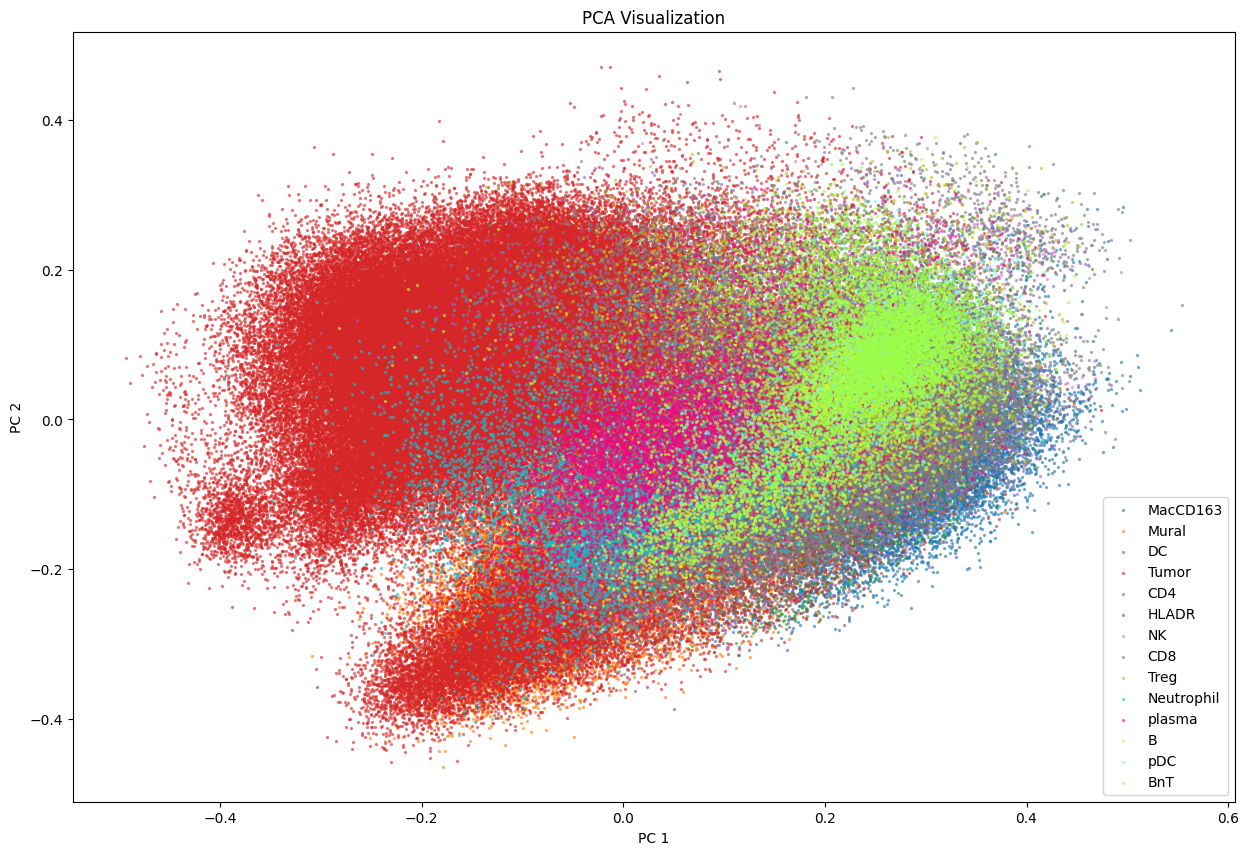

In [ ]:
# PCA from 40-dim space of markers colored by cell type

from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer


expression_values = combined_df.drop(columns=['cell_labels'])

normalizer = Normalizer(norm='l2')
normalized_data = normalizer.fit_transform(expression_values)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(normalized_data)

data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'], index=expression_values.index)
data_pca_df['cell_labels'] = combined_df['cell_labels']


plt.figure(figsize=(15, 10))
for i in range(len(cell_types)):
    plt.scatter(data_pca_df.loc[data_pca_df['cell_labels'] == cell_types[i], 'PC1'],
                data_pca_df.loc[data_pca_df['cell_labels'] == cell_types[i], 'PC2'],
                label=cell_types[i], c=color_map[i], s=2, alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Visualization')
plt.legend()
plt.show()

## Correlation patterns between markers and cell types (at least 3) - with a biological explanation

In [ ]:
grouped_cell_type = combined_df.groupby('cell_labels')

correlation_matrices = {}
for cell_label, group in grouped_cell_type:
    group_numeric = group.drop(columns=['cell_labels'])
    correlation_matrices[cell_label] = group_numeric.corr()


In [ ]:
plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrices['Tumor'], cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Markers in Tumor Cell')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrices['DC'], cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Markers in DC Cell')
plt.show()

In [ ]:
markers = names

# Create violin plots of markers distributions across cell types => specific marker for cell type
for marker in markers:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='cell_labels', y=marker, data=combined_df, inner='quartile')
    plt.title(f'Violin Plot of {marker} across Cell Types')
    plt.xlabel('Cell Type')
    plt.ylabel(f'{marker}')
    plt.xticks(rotation=45)
    plt.show()


# B - CD20
# BnT - CD27, CD20
# CD4 -
# CD8 - CD8a
# DC - CD16, CD11c
# HLADR -
# MacCD163 - CD16, CD163, CD206
# Mural - SMA, HLADR, PDGFRb
# NK - CD16
# Neutrophil - MPO, HistoneH3, HLADR, CD15!
# Treg - CD27, FOXP3, ICOS
# Tumor - HLADR, Ecad
# pDC - CD303
# plasma - CD38, HLADR, CD27

* CD15, an antigen expressed on the surface of immature neutrophils: https://pubmed.ncbi.nlm.nih.gov/28778496/
* CD20 - marker for B-cells: https://pubmed.ncbi.nlm.nih.gov/11225995/
* Ecad for tumor: https://pubmed.ncbi.nlm.nih.gov/32301282/

In [ ]:
# collect cells for each sample and show marker distribution in this sample

from sklearn.preprocessing import StandardScaler

data_extended = {
    'cell_labels': train_anndata_df['cell_labels'],
    'sample_id': train_anndata_df['sample_id'],
    'Pos_X': train_anndata_df['Pos_X'],
    'Pos_Y': train_anndata_df['Pos_Y']
}
extended_df = pd.DataFrame(data_extended, index=train_anndata_df.index)


names = list(train_anndata.var.marker)
expr = pd.DataFrame(train_anndata.layers['exprs'], columns=names, index=indexes) # markers in columns, cells in rows


expr.reset_index(inplace=True)
expr = expr.rename(columns={'index': 'cell_id'})
expr.set_index('cell_id', inplace=True)

scaler = StandardScaler()
expr_scaled = scaler.fit_transform(expr)
expr_scaled = pd.DataFrame(expr_scaled,  columns=names, index=indexes)

marker_exp_df = pd.concat([expr_scaled, extended_df], axis=1)

marker_exp_df.head()

,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,CD163,...,Ecad,CD303,CD206,cleavedPARP,DNA1,DNA2,cell_labels,sample_id,Pos_X,Pos_Y
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1,-0.779886,-0.915213,0.047124,0.564418,-0.001502,0.921412,-0.773344,-0.568460,-0.380382,2.755360,...,-1.256257,-1.882527,4.027352,0.731596,0.546591,0.514850,MacCD163,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,300.846154,0.692308
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_3,-0.383902,-0.334238,1.045495,-0.411527,0.167070,-0.996308,-0.746204,-0.825694,-0.074990,-0.397921,...,-0.515273,-1.756831,-0.060327,-0.348832,0.923545,0.835903,Mural,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,26.982143,0.928571
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_5,-0.296547,-0.484444,1.453734,1.179579,-0.106300,1.415580,-1.451579,-0.490662,0.628404,1.309638,...,-0.609800,-1.145915,2.101022,-0.714613,0.064711,-0.164484,DC,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,309.083333,0.750000
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_7,-0.296547,-1.599701,0.142452,0.436754,-0.003863,-0.027461,-0.355681,-0.717070,0.583496,0.397502,...,-0.258234,-1.524453,0.230576,0.055816,-0.894577,-0.791315,Tumor,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,431.916667,0.750000
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_8,-0.379307,-0.518858,0.660524,-0.421651,-0.191118,-0.419377,-1.291382,-0.747176,0.181377,0.717229,...,-0.179032,-1.770163,1.219782,0.547803,0.330394,0.305897,Tumor,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,116.931034,1.206897


In [ ]:
# create scatterplot of dots-cells colored by marker expression rate and with tumor cells in frame

def draw_marker_exp(marker):
  grouped_exp = marker_exp_df.groupby('sample_id')

  for name, group in grouped_exp:
    x_data = group['Pos_X']
    y_data = group['Pos_Y']

    marker_expression_rates = group[marker]

    mask = group['cell_labels'] == 'Tumor'

    plt.figure(figsize=(10, 10))
    #plt.scatter(x_data, y_data, c=marker_expression_rates, cmap='viridis', label='Non-tumor cells', s=7)
    plt.scatter(x_data[~mask], y_data[~mask], c=marker_expression_rates[~mask], cmap='viridis', label='Non-tumor cells', s=7)
    plt.scatter(x_data[mask], y_data[mask], c=marker_expression_rates[mask], edgecolors= 'lightpink', cmap='viridis', label='Tumor cells', s=15)


    plt.title('Marker ' + marker + ' expression of sample ' + name)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.colorbar(label='Marker Expression Rate')
    plt.legend()
    plt.show()

In [ ]:
draw_marker_exp('HLADR')

cell-subpopulations:

Dowiedzieć się jakie komórki zazwyczaj są blisko komórek nowotworowych (jaka odległość?) -> przyczyny biologiczne


##Three biologically driven patterns of intertype marker differentiation (e.g., Tumor PDL1+ vs Tumor PDL1-, Mac CD206+ vs Mac CD206-, etc.)

In [ ]:
for name in names:
  print(len(expr[expr[name]==0]), name, len(expr[name]))
  print(min(expr[name]), max(expr[name]), name)

1817 MPO 236791
0.0 5.113555872017841 MPO
8 HistoneH3 236791
0.0 7.367522188401677 HistoneH3
44965 SMA 236791
0.0 4.930100116914469 SMA
606 CD16 236791
0.0 4.831407129950345 CD16
2498 CD38 236791
0.0 5.0739969060027175 CD38
232 HLADR 236791
0.0 6.898394369973088 HLADR
537 CD27 236791
0.0 4.035879362615358 CD27
2261 CD15 236791
0.0 7.411533270365392 CD15
2097 CD45RA 236791
0.0 4.504878980277447 CD45RA
2286 CD163 236791
0.0 5.3567324156696055 CD163
11 B2M 236791
0.0 6.325282041568013 B2M
454 CD20 236791
0.0 5.72497083983731 CD20
35 CD68 236791
0.0 7.107868819395931 CD68
65 Ido1 236791
0.0 6.3781518530989985 Ido1
158 CD3 236791
0.0 7.20023394153235 CD3
1462 LAG3 236791
0.0 4.931982177901212 LAG3
243 CD11c 236791
0.0 4.872642999244696 CD11c
505 PD1 236791
0.0 4.063761390316467 PD1
150 PDGFRb 236791
0.0 4.642687433954234 PDGFRb
470 CD7 236791
0.0 5.514248396999017 CD7
92 GrzB 236791
0.0 6.3876692000495074 GrzB
363 PDL1 236791
0.0 5.960477772706506 PDL1
2178 TCF7 236791
0.0 5.134349869021247

In [ ]:
def find_marker_diff(cell, marker, min_cells=30):
  cell_m_df = combined_df[(combined_df['cell_labels']==cell) & (combined_df[marker]==0)]

  if len(cell_m_df) < min_cells: return

  cell_m_df = cell_m_df.drop(columns=['cell_labels'])
  cor_cell_m_df = cell_m_df.corr()

  fig, axs = plt.subplots(1, 2, figsize=(20, 10))

  sns.heatmap(cor_cell_m_df, ax=axs[0], cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
  ax=axs[0].set_title(f'Correlation Heatmap between Markers in {cell} cell for {marker}-')

  cell_p_df = combined_df[(combined_df['cell_labels']==cell) & (combined_df[marker]!=0)]

  cell_p_df = cell_p_df.drop(columns=['cell_labels'])
  cor_cell_p_df = cell_p_df.corr()
  sns.heatmap(cor_cell_p_df, ax=axs[1], cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
  axs[1].set_title(f'Correlation Heatmap between Markers in {cell} cell for {marker}+')

  plt.tight_layout()
  plt.show()

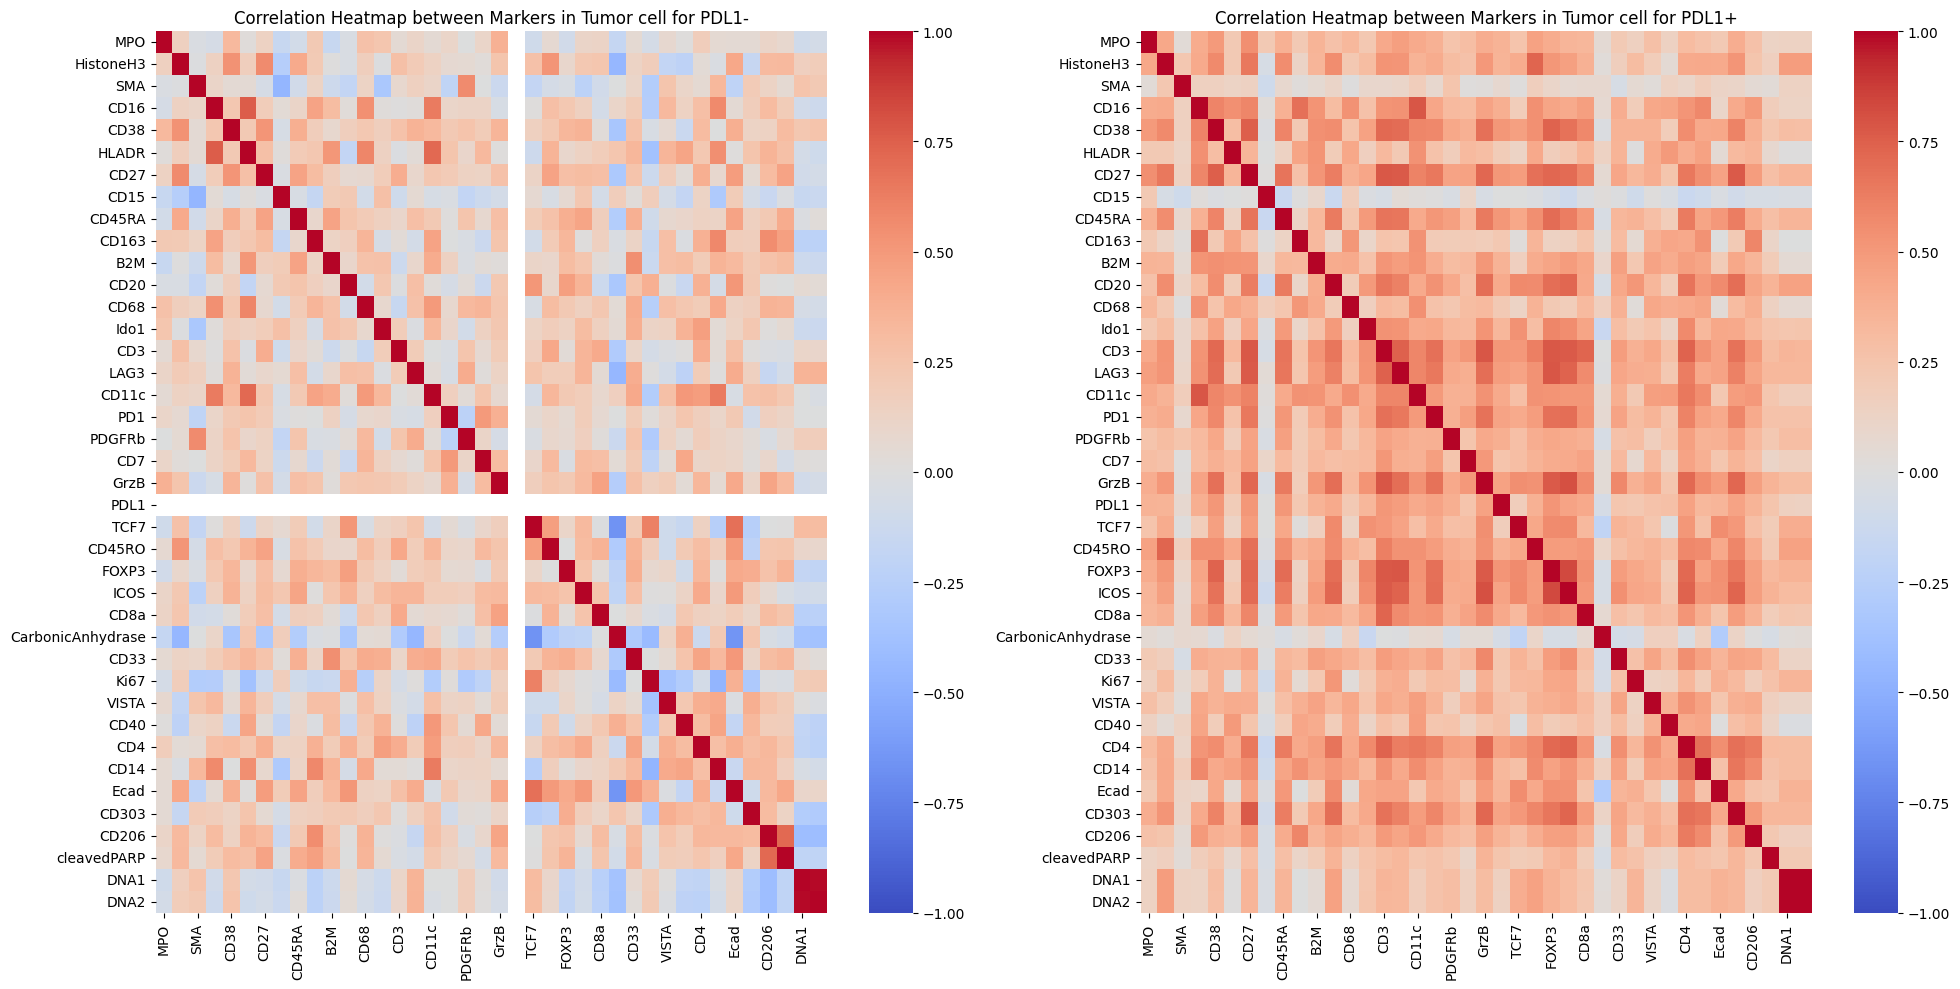

In [ ]:
# Tumor PDL1+ vs Tumor PDL1-

find_marker_diff('Tumor', 'PDL1')

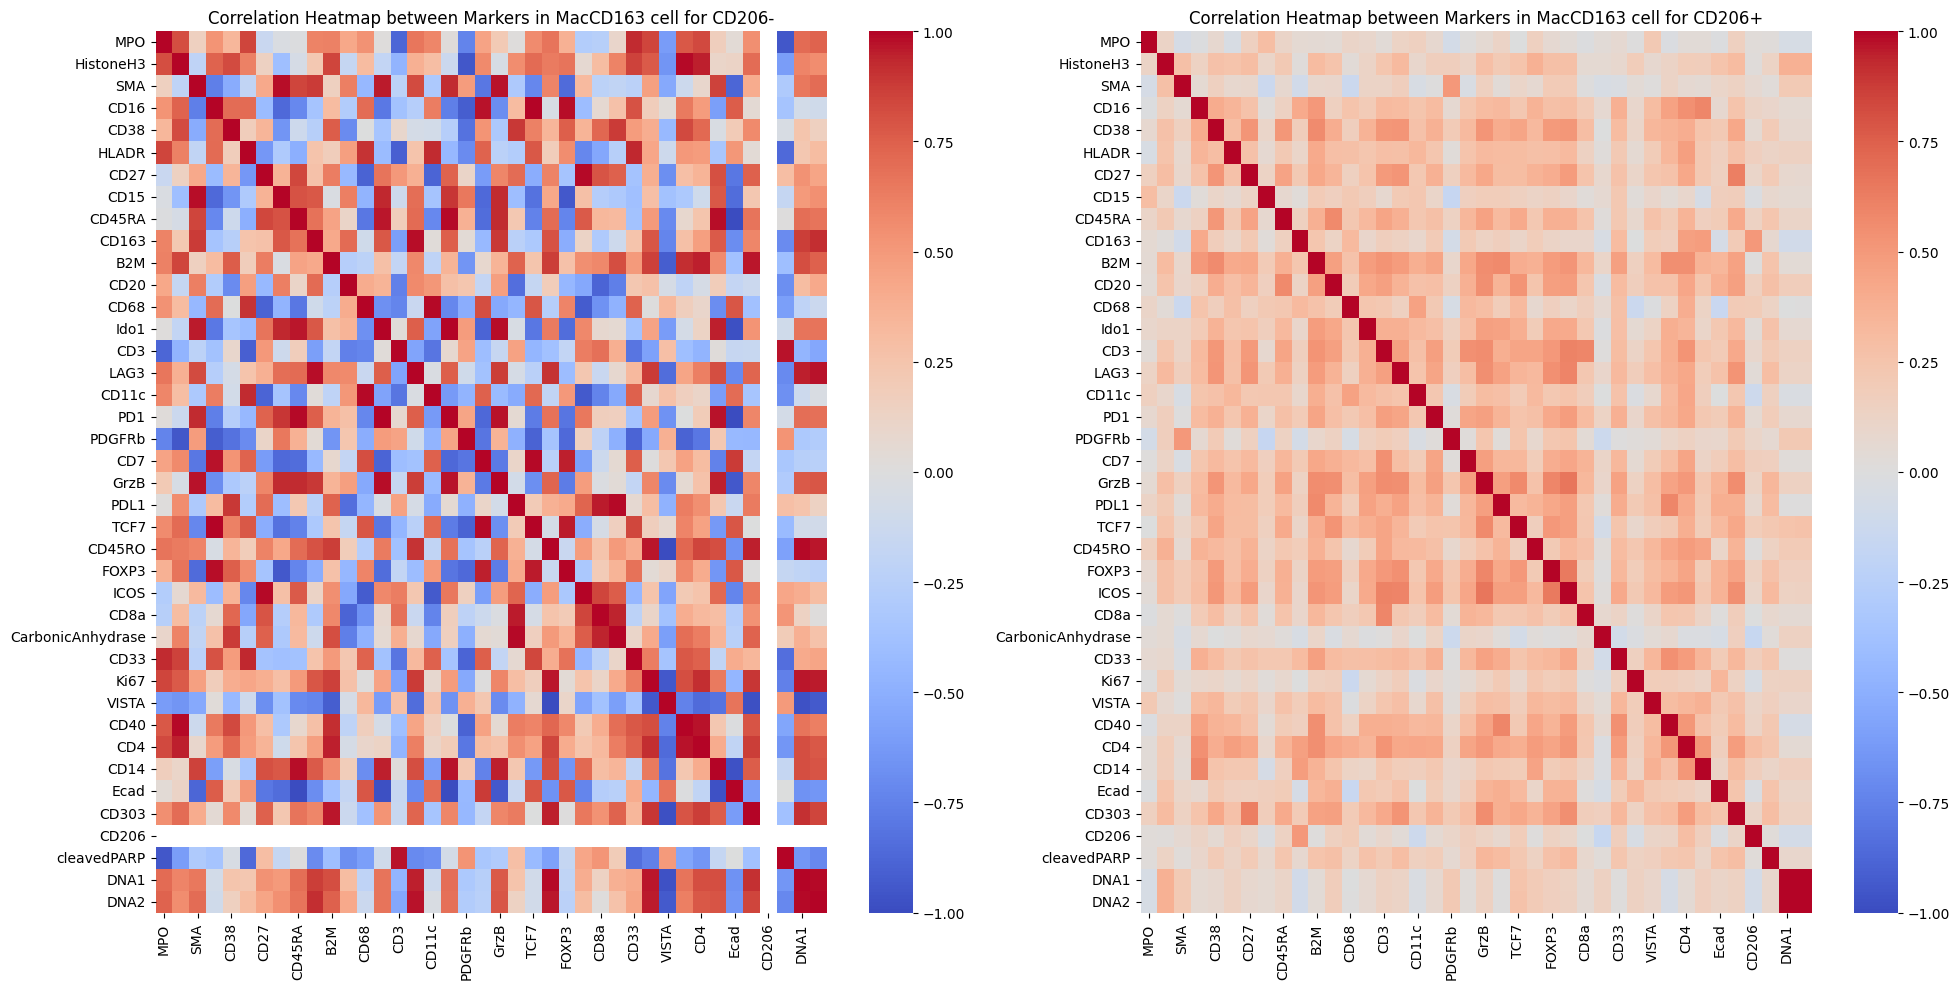

In [ ]:
# Mac CD206+ vs Mac CD206-

find_marker_diff('MacCD163', 'CD206', 4)

In [ ]:
for cell in cell_types:
  for marker in names:
    find_marker_diff(cell, marker)